In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [21]:
# Clean
df["target"] = iris.target
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
df
df = df.drop(columns=["species"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# Visulize/Understand
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


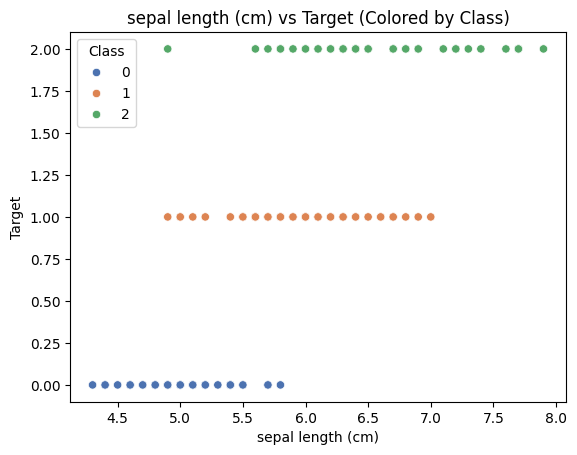

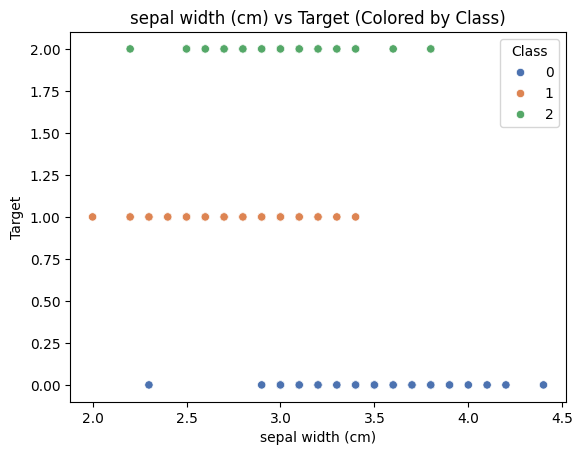

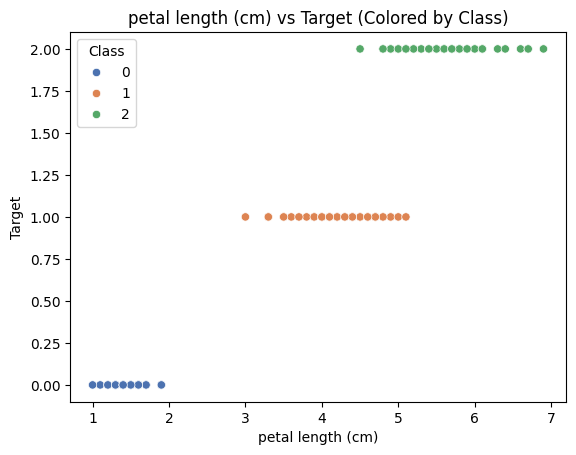

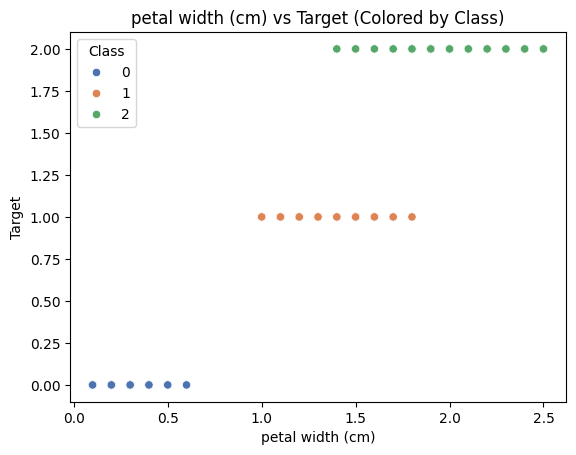

In [25]:
features = ["sepal length (cm)", 
            "sepal width (cm)", 
            "petal length (cm)", 
            "petal width (cm)"]

for feature in features:
    plt.figure()
    sns.scatterplot(
        x=df[feature],
        y=df["target"],
        hue=df["target"],      # color by class
        palette="deep"
    )
    plt.title(f"{feature} vs Target (Colored by Class)")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.legend(title="Class")
    plt.show()

c:\Miniconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


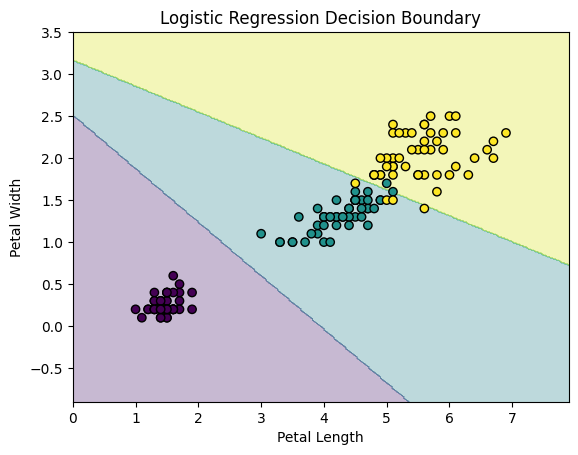

In [ ]:
# Based on data a classifaction algoirthm looks best, logistic, naive bayes, svm, pca, knn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

X = df.drop(columns=["target"])
y = df["target"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

# Fit once to get confusion matrix
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))



In [23]:
from sklearn.neighbors import KNeighborsClassifier


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

# Fit once for confusion matrix
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

accuracy mean: 0.9733333333333334
precision_macro mean: 0.9745454545454546
recall_macro mean: 0.9733333333333333
f1_macro mean: 0.9732999164578111
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



accuracy mean: 0.96
precision_macro mean: 0.9610774410774411
recall_macro mean: 0.96
f1_macro mean: 0.9599331662489557
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



c:\Miniconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


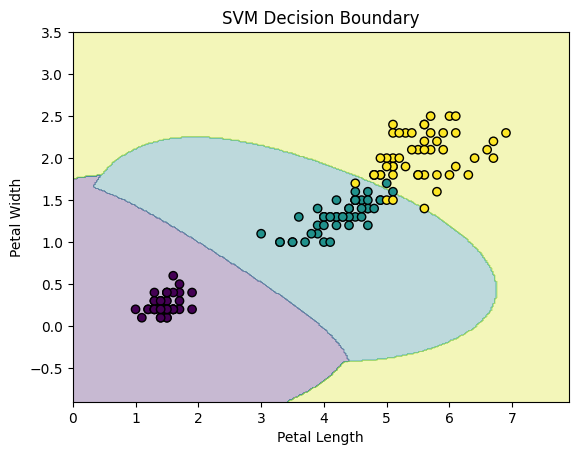

In [38]:
from sklearn.svm import SVC

X = df.drop(columns=["target"])
y = df["target"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

# Fit once for confusion matrix
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

X_2d = df[["petal length (cm)", "petal width (cm)"]]
y = df["target"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0))
])

pipeline.fit(X_2d, y)

# Create grid
x_min, x_max = X_2d.iloc[:,0].min() - 1, X_2d.iloc[:,0].max() + 1
y_min, y_max = X_2d.iloc[:,1].min() - 1, X_2d.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], c=y, edgecolor="k")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVM Decision Boundary")
plt.show()


In [33]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns=["target"])
y = df["target"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GaussianNB())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = [
    "accuracy",
    "precision_macro",
    "recall_macro",
    "f1_macro",
    "roc_auc_ovr"
]

results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

print("Cross-Validation Results:")
for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

# Fit once on full data for confusion matrix
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

Cross-Validation Results:
accuracy mean: 0.9466666666666667
precision_macro mean: 0.9488215488215488
recall_macro mean: 0.9466666666666667
f1_macro mean: 0.9465329991645781
roc_auc_ovr mean: 0.9933333333333334

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [34]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=["target"])
y = df["target"]

model = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = cross_validate(model, X, y, cv=cv, scoring=scoring)

print("Decision Tree Results:")
for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

Decision Tree Results:
accuracy mean: 0.9533333333333335
precision_macro mean: 0.9572390572390572
recall_macro mean: 0.9533333333333334
f1_macro mean: 0.9531151110098477


In [35]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["target"])
y = df["target"]

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = cross_validate(model, X, y, cv=cv, scoring=scoring)

print("Random Forest Results:")
for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

Random Forest Results:
accuracy mean: 0.9466666666666667
precision_macro mean: 0.9511784511784512
recall_macro mean: 0.9466666666666667
f1_macro mean: 0.9464317359054201


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(columns=["target"])
y = df["target"]

model = GradientBoostingClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = cross_validate(model, X, y, cv=cv, scoring=scoring)

print("Gradient Boosting Results:")
for metric in scoring:
    print(metric, "mean:", np.mean(results["test_" + metric]))

Gradient Boosting Results:
accuracy mean: 0.9533333333333335
precision_macro mean: 0.9572390572390572
recall_macro mean: 0.9533333333333334
f1_macro mean: 0.9531151110098477
